#### 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 2. LOAD DATA 

In [13]:
# Load the train and test datasets, "train.csv" and "test.csv" are in the same folder)
train_df = pd.read_csv(r"Dataset/train.csv")Titani Project\Dataset\train.csv"
test_df = pd.read_csv(r"Dataset/test.csv")

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Pascal De Souza\AppData\Local\Temp\ipykernel_1236\2965939861.py:3: SyntaxWarning: invalid escape sequence '\D'
  test_df = pd.read_csv('Titani Project\Dataset\test.csv')
C:\Users\Pascal De Souza\AppData\Local\Temp\ipykernel_1236\2965939861.py:3: SyntaxWarning: invalid escape sequence '\D'
  test_df = pd.read_csv('Titani Project\Dataset\test.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Titani Project\\Dataset\\train.csv'

#### 3. EXPLORATORY DATA ANALYSIS (EDA)

##### Print basic information

In [32]:
print("Train Dataset Overview:")
print(train_df.info())
print("\nMissing Values in Train Dataset:\n", train_df.isnull().sum())

Train Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values in Train Dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare     

In [33]:
print("\nTest Dataset Overview:")
print(test_df.info())
print("\nMissing Values in Test Dataset:\n", test_df.isnull().sum())


Test Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Missing Values in Test Dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### Display the first 5 rows of the train dataset

In [34]:
print('Train Data:')
print(train_df.head())

Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

##### Display the first 5 rows of the train dataset

In [35]:
print('Test Data:')
print(test_df.head())

Test Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


##### Get summary statistics for the train data

In [36]:
print("Train Data Description")
print(train_df.describe())

Train Data Description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


##### Get summary statistics for the test data

In [37]:
print("Test Data Description")
print(test_df.describe())

Test Data Description
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


##### Get Columns labels of the Datasets

In [38]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [41]:
train_df.info()
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### Visualizing survival counts

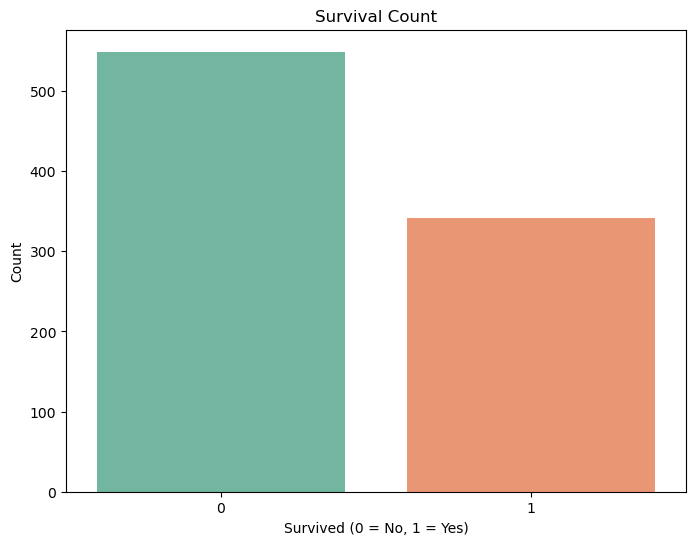

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived', hue='Survived', palette='Set2', legend=False)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

##### Survival by Passenger Class

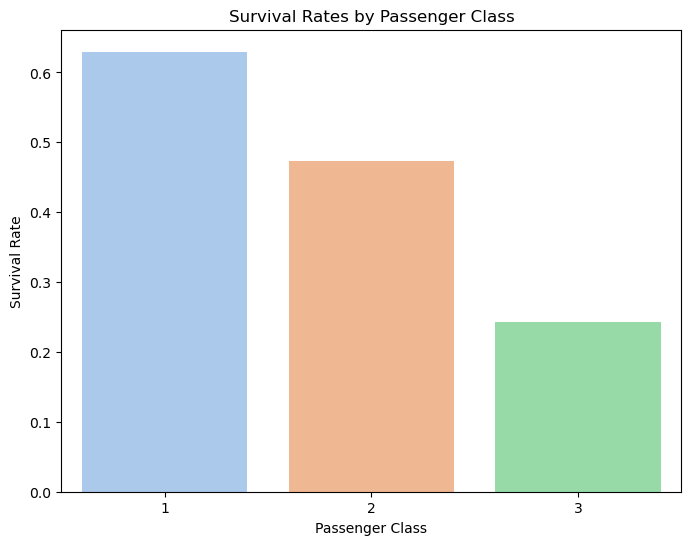

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Pclass", y="Survived", hue="Pclass", palette="pastel", errorbar=None, legend=False)
plt.title("Survival Rates by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

##### Age Distribution

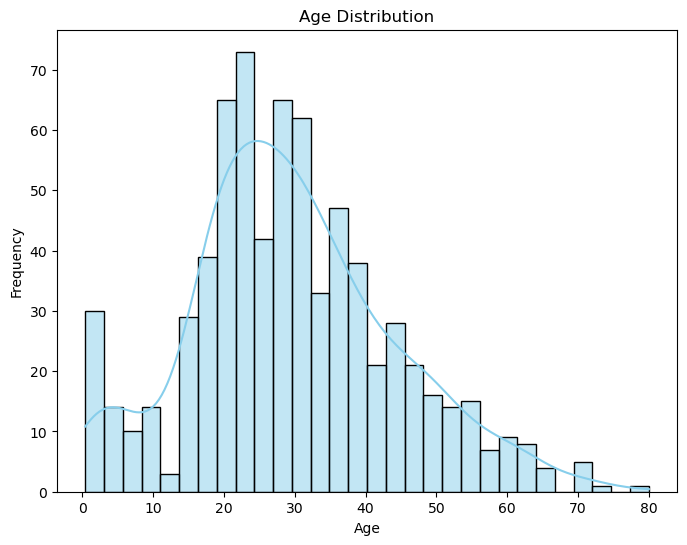

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

##### Embarked vs. Survival

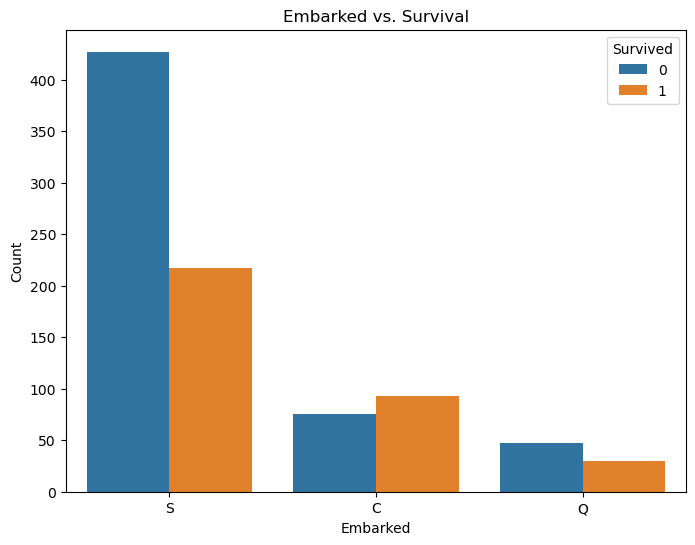

In [45]:
 plt.figure(figsize=(8, 6))
 sns.countplot(x='Embarked', hue='Survived', data=train_df)
 plt.title('Embarked vs. Survival')
 plt.xlabel('Embarked')
 plt.ylabel('Count')
 plt.show()

##### Correlation Heatmap

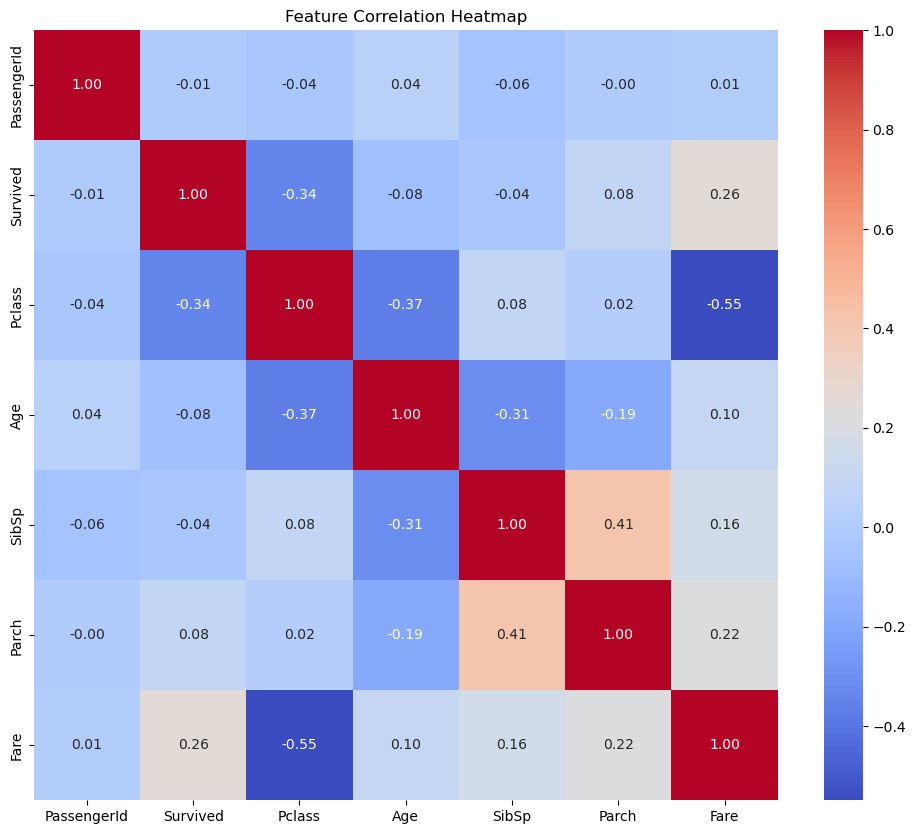

In [46]:
plt.figure(figsize=(12, 10))
numeric_df = train_df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### 4. FEATURE ENGINEERING & DATA CLEANING

##### Create 'Title' feature from the 'Name' column

In [47]:
# Function to extract title from a Name
def extract_title(name):
    if pd.isnull(name):
        return "None"
    return name.split(',')[1].split('.')[0].strip()

In [48]:
# Create a Title feature on both training and test sets
train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

##### Standardize rare titles

In [49]:
#(optional)
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Lady": "Royal", "Countess": "Royal",
    "Capt": "Officer", "Col": "Officer", "Don": "Royal", "Dr": "Officer", "Major": "Officer",
    "Rev": "Officer", "Sir": "Royal", "Jonkheer": "Royal", "Dona": "Royal"
}
train_df['Title'] = train_df['Title'].replace(title_mapping)
test_df['Title'] = test_df['Title'].replace(title_mapping)

In [50]:
# Create a 'HasCabin' feature: 1 if cabin info is present, 0 if missing
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)
test_df['HasCabin'] = test_df['Cabin'].notnull().astype(int)

##### Fill missing Age with median value

In [51]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())

##### Fill missing Embarked with mode

In [52]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

##### Fill missing Fare in test dataset

In [53]:
# There is sometimes missing Fare on the test set—fill with median Fare value
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

##### encode categorical variables

In [54]:
# List of features to encode
cat_features = ['Sex', 'Embarked', 'Title']

# Apply one-hot encoding to both datasets
train_df = pd.get_dummies(train_df, columns=cat_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cat_features, drop_first=True)

##### Ensure test_df has the same dummy columns as train_df

In [55]:
# It is a good idea to reindex the test set so that it has the same dummy columns as train.
missing_cols = set(train_df.columns) - set(test_df.columns) - {'Survived'}
for col in missing_cols:
    test_df[col] = 0

# Ensure same column order in test as in training feature set
test_df = test_df[ [col for col in train_df.columns if col != 'Survived'] ]

In [56]:
# Save PassengerId for submission
passenger_ids = test_df['PassengerId']

# Drop columns that won’t help for prediction
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

#### 5. MODEL PREPARATION

In [57]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# Optionally, split train data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#### 6. MODEL TRAINING & EVALUATION

##### First Mode: Logistic Regression

In [59]:
# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

##### Evaluate Logistic Regression

In [61]:
lr_pred = logistic_model.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_pred)
print("Logistic Regression Validation Accuracy:", lr_accuracy)
print(classification_report(y_val, lr_pred))


Logistic Regression Validation Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



##### Second Model: Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest model
randomf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Assuming X_train and y_train are your feature matrix and target vector
randomf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##### Evaluate Random Forest

In [63]:
rf_preds = randomf_model.predict(X_val)
rf_acc = accuracy_score(y_val, rf_preds)
print("Random Forest Accuracy on Validation Set: {:.4f}".format(rf_acc))
print("Classification Report (Random Forest):\n", classification_report(y_val, rf_preds))

Random Forest Accuracy on Validation Set: 0.8268
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



##### Cross-validation

In [65]:
lr_cv_scores = cross_val_score(logistic_model, X, y, cv=5)
rf_cv_scores = cross_val_score(randomf_model, X, y, cv=5)

print("Logistic Regression CV Accuracy: {:.4f} ± {:.4f}".format(lr_cv_scores.mean(), lr_cv_scores.std()))
print("Random Forest CV Accuracy: {:.4f} ± {:.4f}".format(rf_cv_scores.mean(), rf_cv_scores.std()))


Logistic Regression CV Accuracy: 0.8204 ± 0.0240
Random Forest CV Accuracy: 0.8148 ± 0.0407


#### 7. PREDICTING ON THE TEST SET

In [67]:
# Use the chosen model (here, rf_model) to predict the survival outcome on the test set.
final_predictions = logistic_model.predict(test_df)

##### Prepare a submission DataFrame

In [68]:
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": final_predictions
})

# Verify the number of entries (should be 418)
print("Submission shape:", submission.shape)

# Write to CSV (without row indices)
submission.to_csv("submission_test.csv", index=False)


Submission shape: (418, 2)


#### 8. VISUALIZATION

##### Feature Importance (Random Forest)

In [69]:
importances = randomf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

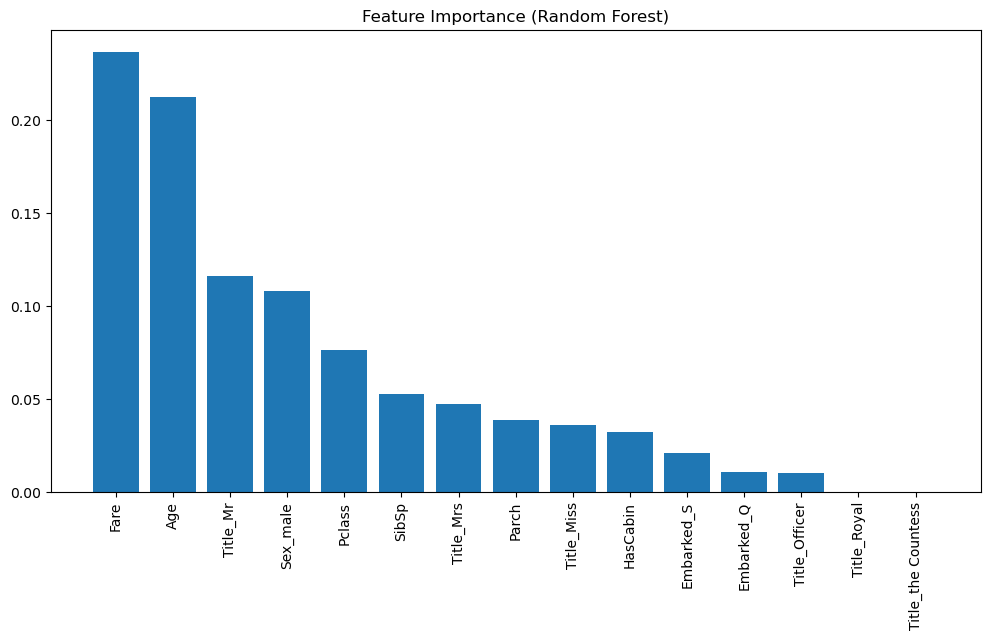

In [70]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()